 # Kernel PCA (KPCA)

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy.spatial.distance import pdist
#from scipy.spatial.distance import squeareform
from scipy.linalg import eigh



In [3]:
def rbf_kpca(X,gamma,n_components):
    #obtener las distancias cuadradas de todas las parejas de vectores
    sq_dists=pdist(X,'sqeuclidean') #distancia euclideana cuadratica
    #convertir a una matriz
    mat_sq_dist = squeareform(sq_dists)
    #obtener matriz de nucleos
    K = np.exp(-gamma*mat_sq_dist)
    #centrar la matriz
    N=K.shape[0]
    one_n = np.ones((N,N))/N
    K=K-one_n.dot(K)-K.dot(one_n)+one_n.dot(K).dot(one_n)
    #obtener los eigenpares; scipy.linalg.eigh los devuelve ordenados (asc)
    eigenvals,eigenvecs =eigh(K)
    eigenvals,eigenvecs = eigenvals[::-1],eigenvecs[:,::-1] #Invertir los eigenvals
    #seleccionar los k primeros eigenpares
    alphas = np.column_stack([eigenvecs[:,i] for i in range(n_components)])
    lambdas = np.column_stack([eigenvals[i] for i in range(n_components)])
    return alphas,lambdas


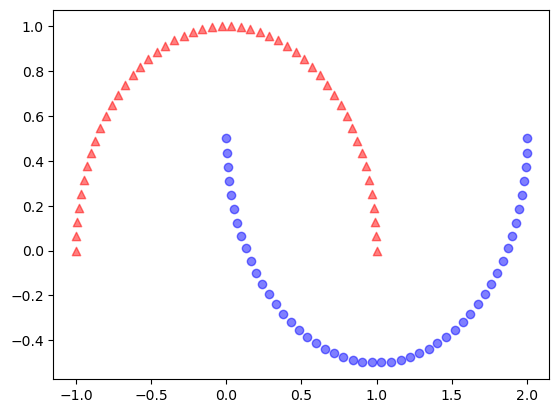

In [5]:
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=100, random_state=123)
plt.scatter(X[y==0,0],X[y==0,1],color='red',marker='^',alpha=0.5)
plt.scatter(X[y==1,0],X[y==1,1],color='blue',marker='o',alpha=0.5)
plt.show()

In [1]:
#con PCA
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
X_pca =pca.fit_transform(X)

NameError: name 'X' is not defined

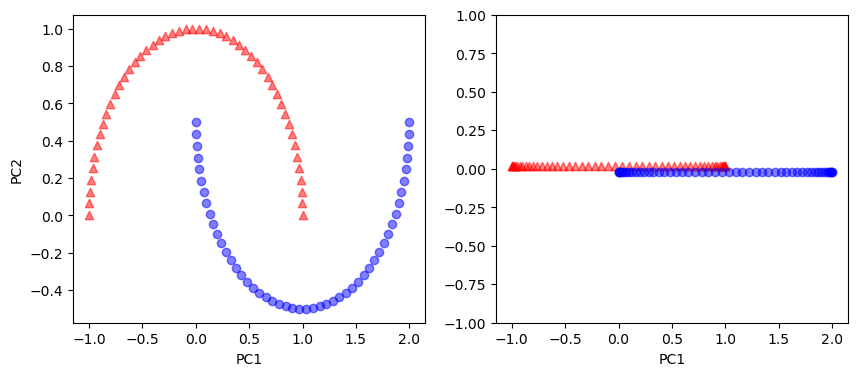

In [7]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,4))
ax[0].scatter(X[y==0,0],X[y==0,1],color='red',marker='^',alpha=0.5)
ax[0].scatter(X[y==1,0],X[y==1,1],color='blue',marker='o',alpha=0.5)
ax[1].scatter(X[y==0,0],np.zeros((50,1))+0.02,color='red',marker='^',alpha=0.5)
ax[1].scatter(X[y==1,0],np.zeros((50,1))-0.02,color='blue',marker='o',alpha=0.5)
ax[0].set_ylabel('PC2')
ax[0].set_xlabel('PC1')
ax[1].set_xlabel('PC1') 
ax[1].set_ylim([-1,1])
plt.show()

In [23]:
X_kpca,_=rbf_kpca(X,gamma=15,n_components=2)
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,4))
ax[0].scatter(X_kpca[y==0,0],X_kpca[y==0,1],color='red',marker='^',alpha=0.5)
ax[0].scatter(X_kpca[y==1,0],X_kpca[y==1,1],color='blue',marker='o',alpha=0.5)
ax[1].scatter(X_kpca[y==0,0],np.zeros((50,1))+0.02,color='red',marker='^',alpha=0.5)
ax[1].scatter(X_kpca[y==1,0],np.zeros((50,1))-0.02,color='blue',marker='o',alpha=0.5)
ax[0].set_ylabel('PC2')
ax[0].set_xlabel('PC1')
ax[1].set_xlabel('PC1')
ax[1].set_ylim([-1,1])
plt.show()

NameError: name 'squeareform' is not defined

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons
X,y=make_moons(n_samples=100,random_state=123)

In [25]:
from sklearn.decomposition import KernelPCA


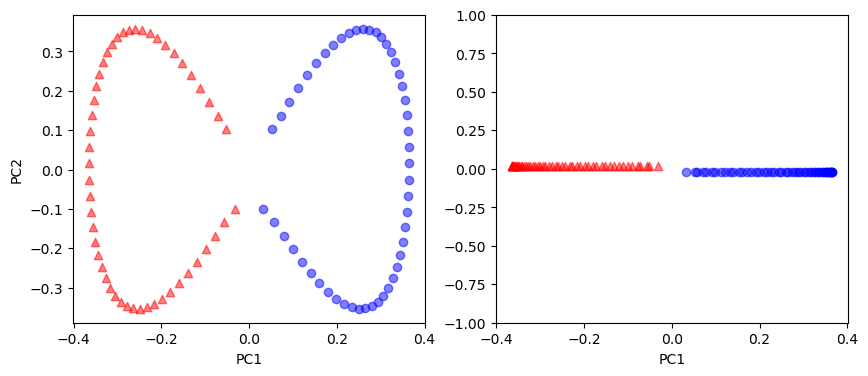

In [33]:
kpca = KernelPCA(n_components=2,kernel='rbf',gamma=15)
X_kpca=kpca.fit_transform(X)
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,4))
ax[0].scatter(X_kpca[y==0,0],X_kpca[y==0,1],color='red',marker='^',alpha=0.5)
ax[0].scatter(X_kpca[y==1,0],X_kpca[y==1,1],color='blue',marker='o',alpha=0.5)
ax[1].scatter(X_kpca[y==0,0],np.zeros((50,1))+0.02,color='red',marker='^',alpha=0.5)
ax[1].scatter(X_kpca[y==1,0],np.zeros((50,1))-0.02,color='blue',marker='o',alpha=0.5)
ax[0].set_ylabel('PC2')
ax[0].set_xlabel('PC1')
ax[1].set_xlabel('PC1')
ax[1].set_ylim([-1,1])
plt.show()

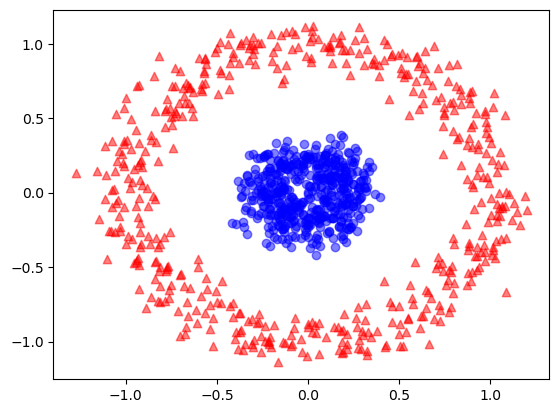

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_circles
X,y=make_circles(n_samples=1000,random_state=123,noise=0.1,factor =0.2)
plt.scatter(X[y==0,0],X[y==0,1],color='red',marker='^',alpha=0.5)
plt.scatter(X[y==1,0],X[y==1,1],color='blue',marker='o',alpha=0.5)
plt.show()